In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use("seaborn")
#import gmaps
#import googlemaps
#from api_keys import g_key
#from _api_keys import g_key
import requests
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


import json
import time
from scipy import stats
from scipy.stats import linregress

# Setting up the data

## Rent 2020-2022

In [35]:
# displaying the 2020 rent csv file 

rents_2020 = pd.read_csv("UTF/FY2020_50_County_rev.csv")
rents_2020.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub20,areaname20,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [36]:
# displaying the 2021 rent csv file 

rents_2021 = pd.read_csv("UTF/FY2021_50_County.csv")
rents_2021.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub21,areaname21,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [37]:
# displaying the 2021 rent csv file 

rents_2022 = pd.read_csv("UTF/FY2022_FMR_50_county_rev.csv")
rents_2022 = rents_2022.rename(columns = {'state_code': 'state', 'county_code': 'county', 'county_sub_code': 'cousub'})
rents_2022.head()

,state,county,cousub,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,48,59,99999,Callahan County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,13660
1,48,253,99999,Jones County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,19970
2,48,441,99999,Taylor County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,135370
3,72,3,99999,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,39470
4,72,5,99999,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,55720


## Merging 2020-2022 Datasets

In [38]:
# Merging the 2020 and 2021 dataset and converting them into a data frame 

rent_20_21 = pd.merge(rents_2020, rents_2021, how="left", on=["state", "county", "cousub"], suffixes=('_2020', '_2021'))
rent_20_21.head()

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,rent50_2_2021,rent50_3_2021,rent50_4_2021,cbsasub21,areaname21,cntyname_2021,name_2021,pop2017_2021,hu2017_2021,state_alpha_2021
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Callahan County,Callahan County,13660.0,6637.0,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Jones County,Jones County,19970.0,7292.0,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Taylor County,Taylor County,135370.0,56978.0,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguada Municipio,Aguada Municipio,39470.0,17385.0,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguadilla Municipio,Aguadilla Municipio,55720.0,27301.0,PR


In [39]:
#merging the above DF to 2022 dataset and convert them into a DataFrame

rent_20_21_22 = pd.merge(rent_20_21, rents_2022, how="left", on=["state", "county", "cousub"])
rent_20_21_22.head()

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,Callahan County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,13660.0
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,Jones County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,19970.0
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,Taylor County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,135370.0
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,39470.0
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,55720.0


In [40]:
# load rent data
rent = pd.read_csv("rent.csv")

# means grouped by state and year
state_sy = rent.groupby(["state initials", "year"])["state initials"].first().to_list()
year_sy = rent.groupby(["state initials", "year"])["year"].first().to_list()
bed_0_sy = rent.groupby(["state initials", "year"]).mean()["rent50_0"].to_list()
bed_1_sy = rent.groupby(["state initials", "year"]).mean()["rent50_1"].to_list()
bed_2_sy = rent.groupby(["state initials", "year"]).mean()["rent50_2"].to_list()
bed_3_sy = rent.groupby(["state initials", "year"]).mean()["rent50_3"].to_list()
bed_4_sy = rent.groupby(["state initials", "year"]).mean()["rent50_4"].to_list()

rent_summary_sy = pd.DataFrame(
    {'State': state_sy, 'Year': year_sy, 'Studio': bed_0_sy, '1 Bedroom': bed_1_sy,
     '2 Bedroom': bed_2_sy, '3 Bedroom': bed_3_sy, '4 Bedroom': bed_4_sy}).round(2)


# Cleaning Data

In [41]:
# Checking the columns

rent_20_21_22.columns

Index(['fips2010_2020', 'rent50_0_2020', 'rent50_1_2020', 'rent50_2_2020',
       'rent50_3_2020', 'rent50_4_2020', 'state', 'cbsasub20', 'areaname20',
       'county', 'cousub', 'cntyname_2020', 'name_2020', 'pop2017_2020',
       'hu2017_2020', 'state_alpha_2020', 'fips2010_2021', 'rent50_0_2021',
       'rent50_1_2021', 'rent50_2_2021', 'rent50_3_2021', 'rent50_4_2021',
       'cbsasub21', 'areaname21', 'cntyname_2021', 'name_2021', 'pop2017_2021',
       'hu2017_2021', 'state_alpha_2021', 'cntyname', 'town_name',
       'areaname22', 'rent_50_0', 'rent_50_1', 'rent_50_2', 'rent_50_3',
       'rent_50_4', 'cbsasub22', 'pop2017'],
      dtype='object')

In [42]:
# Reducing DataFrame to necessary columns

cleaned_rent_20_21_22 = rent_20_21_22[['state', 'county', 'cntyname_2020', 'state_alpha_2020',\
                                       'rent50_0_2020', 'rent50_0_2021', 'rent_50_0', 'rent50_1_2020',\
               'rent50_1_2021', 'rent_50_1', 'rent50_2_2020', 'rent50_2_2021', 'rent_50_2', 'rent50_3_2020', 'rent50_3_2021',\
               'rent_50_3', 'rent50_4_2020', 'rent50_4_2021', 'rent_50_4', 'pop2017_2020']]

# Renaming columns
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.rename(columns = {'state_alpha_2020': 'state initial', 'cntyname_2020': 'county name', 'rent_50_0': 'studio_2022',\
                                                                'rent50_0_2020': 'studio_2020', 'rent50_0_2021': 'studio_2021', 'rent50_1_2020': 'bedroom_1_2020',\
                                                                'rent50_1_2021': 'bedroom_1_2021', 'rent_50_1': 'bedroom_1_2022', 'rent50_2_2020': 'bedroom_2_2020',\
                                                                'rent50_2_2021': 'bedroom_2_2021', 'rent_50_2': 'bedroom_2_2022', 'rent50_3_2020': 'bedroom_3_2020',\
                                                                'rent50_3_2021': 'bedroom_3_2021', 'rent_50_3': 'bedroom_3_2022', 'rent50_4_2020': 'bedroom_4_2020','rent50_4_2021': 'bedroom_4_2021',\
 
                                                                'rent_50_4': 'bedroom_4_2022', 'pop2017_2020': 'pop2017'})

# Dropping null values from the dataset
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.dropna()
cleaned_rent_20_21_22

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [43]:
cleaned_rent_20_21_22.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017'],
      dtype='object')

In [44]:
#Exporting CSV Files
#cleaned_rent_20_21_22.to_csv("../Merged_Data/rent20-22.csv")
#cleaned_rent_20_21_22.to_csv("rent20-22.csv")

# Plotting Average Rents for each Bedroom Type (All States 2020-2022)

In [45]:
# Creating a list of the average median rents for 2020 - 2022
averages_2020 = list(cleaned_rent_20_21_22[["studio_2020","bedroom_1_2020","bedroom_2_2020","bedroom_3_2020","bedroom_4_2020"]].mean())
averages_2021 = list(cleaned_rent_20_21_22[["studio_2021","bedroom_1_2021","bedroom_2_2021","bedroom_3_2021","bedroom_4_2021"]].mean())
averages_2022 = list(cleaned_rent_20_21_22[["studio_2022","bedroom_1_2022","bedroom_2_2022","bedroom_3_2022","bedroom_4_2022"]].mean())

In [46]:
# Creating a DataFrame for the averages of 2020-2022
averages_DF = pd.DataFrame({"Average 2020": averages_2020,
                            "Average 2021": averages_2021,
                            "Average 2022": averages_2022
                           })

# Display DataFrame
averages_DF

,Average 2020,Average 2021,Average 2022
0,707.401348,735.416509,769.124868
1,783.532323,810.826069,843.285534
2,976.300063,1011.826911,1052.408718
3,1280.773005,1321.444304,1367.686039
4,1466.904611,1517.088229,1573.461781


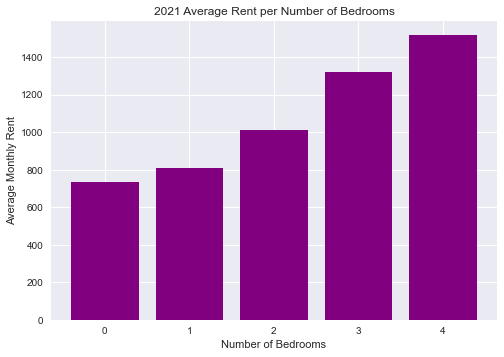

In [47]:
# Plotting a bar chart showing the average rents for 2021


x_axis = np.arange(len(averages_DF))
plt.bar(x_axis, averages_DF["Average 2021"], color="purple")


plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Monthly Rent")
plt.title("2021 Average Rent per Number of Bedrooms")
plt.show()

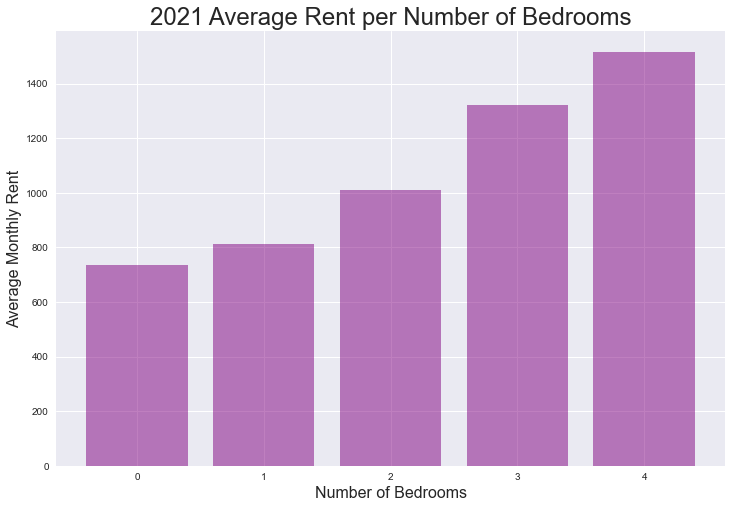

In [117]:
# format edits 

plt.figure(figsize=(12, 8))
x_axis = np.arange(len(averages_DF))
plt.bar(x_axis, averages_DF["Average 2021"], color="purple",alpha=0.5, align="center")


plt.xlabel("Number of Bedrooms", size=16)
plt.ylabel("Average Monthly Rent", size=16)
plt.title("2021 Average Rent per Number of Bedrooms", size=24)
plt.show()

The average monthly price of a 4-bedroom place is $782 higher than a studio apartment. As the number of bedrooms increases, the average monthly price increases as well.

- % Increase from studio to 1 bedroom: 10%
- % Increase from 1 bedroom to 2 bedrooms: 22% 
- % Increase from 2 bedrooms to 3 bedrooms: 26% 
- % Increase from 3 bedrooms to 4 bedrooms: 13% 

In [2]:
##Considering Roomates

In [3]:
#bring in the csv's 
roommate_data_df = pd.read_csv("State avg by room size.csv")

In [4]:
roommate_data_df.head()

,States,Average of studio_2021,Average of bedroom_1_2021,Average of bedroom_2_2021,Average of bedroom_3_2021,Average of bedroom_4_2021,Avg_2bed_2RM,Avg_3bed_3RM,Avg_4bed_4RM
0,AK,908.0,1012.1,1281.3,1684.9,1937.9,641,562,484
1,AL,579.8,626.0,767.4,1003.7,1157.0,384,335,289
2,AR,535.0,574.3,723.0,954.2,1104.3,362,318,276
3,AS,635.0,640.0,843.0,1206.0,1293.0,422,402,323
4,AZ,746.5,821.6,1037.5,1433.0,1596.9,519,478,399


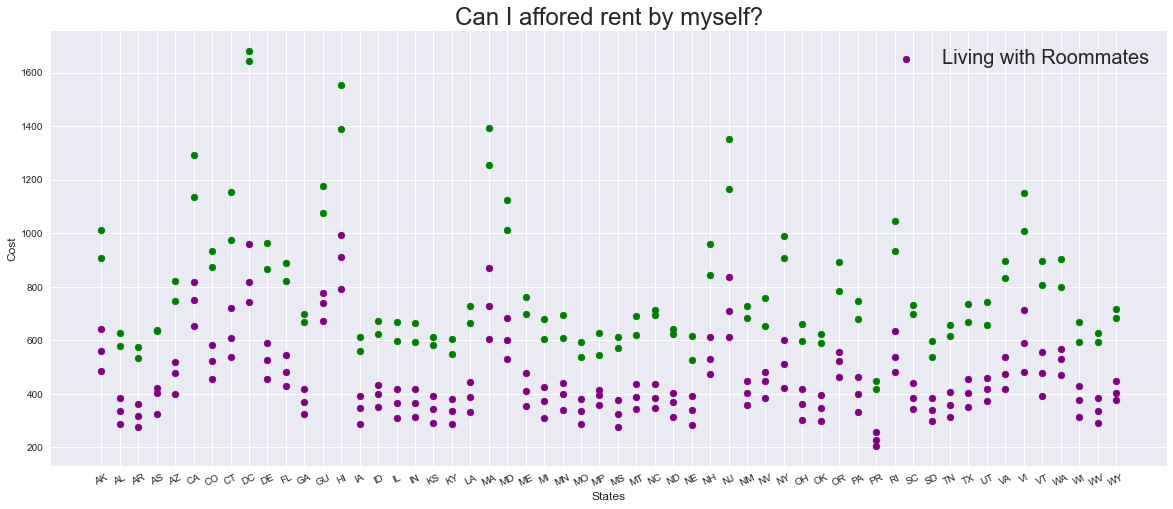

In [5]:
plt.figure(figsize=(20, 8))

plt.scatter(roommate_data_df["States"], roommate_data_df["Average of studio_2021"], color = "green")
plt.scatter(roommate_data_df["States"], roommate_data_df["Average of bedroom_1_2021"], color = "green")

plt.scatter(roommate_data_df["States"], roommate_data_df["Avg_2bed_2RM"], color = "purple", label="Living with Roommates")
plt.scatter(roommate_data_df["States"], roommate_data_df["Avg_3bed_3RM"], color = "purple")
plt.scatter(roommate_data_df["States"], roommate_data_df["Avg_4bed_4RM"], color = "purple")

#add legend
plt.legend(fontsize = 20)

plt.xlabel("States", size=12)
plt.ylabel("Cost", size=12)
plt.xticks(rotation=25)
plt.title("Can I affored rent by myself?", size=24)

plt.show()

In [7]:
#ver_side barchart 
avg_cost = [752, 826, 1030, 515, 1367, 456, 1580, 395]
living_arrangements01 = ["Studio", "1 Bed", "2 Bed", "2 Bed, 1 Mate", "3 Bed", "3 Bed, 2 Mate", "4 Bed", "4 Bed, 3 Mate"]


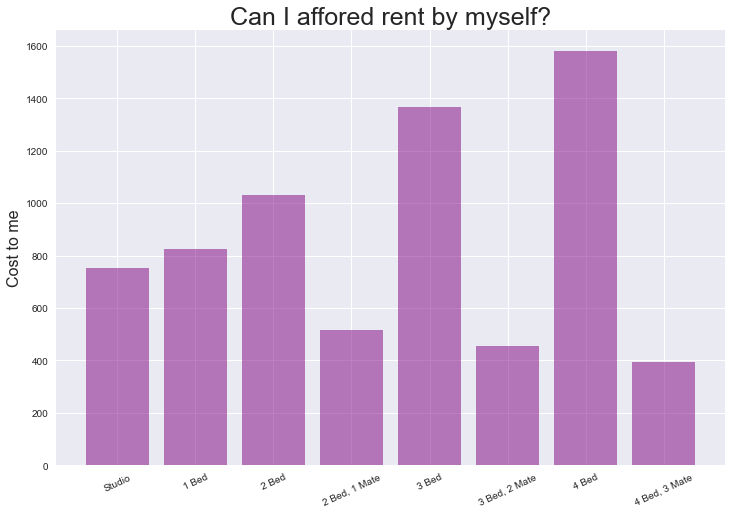

In [8]:
#ver_side barchart 
plt.figure(figsize=(12, 8))

x_axis = living_arrangements01
plt.bar(x_axis, avg_cost, color="purple", alpha=0.5, align="center")

plt.ylabel("Cost to me", size=16)
plt.title("Can I affored rent by myself?", size=25)

plt.xticks(rotation=25)

plt.show()

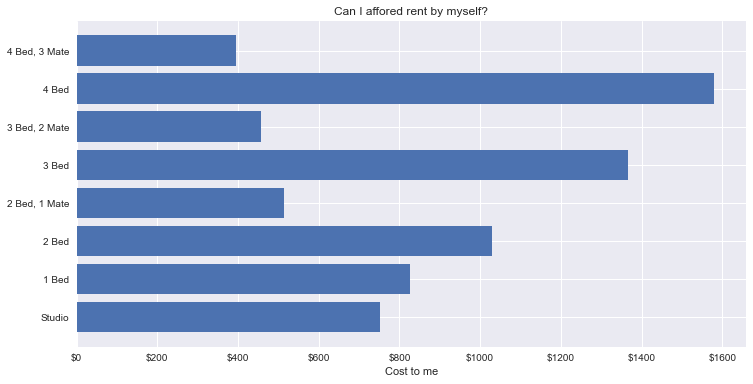

In [9]:
#02ver_side barchart 
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(living_arrangements01, avg_cost)

#labels = ax.get_xticklabels()
ax.set(xlabel='Cost to me', title='Can I affored rent by myself?')
ax.xaxis.set_major_formatter('${x:1.0f}')

plt.show()

#could not get this "ax.barh" chart purple with a big work around, Lets leave it out of the slides, I did get the money $ign  :)

In [63]:
# b1 data 2021
b121DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["1 Bedroom"]})
# b1 data 2020
b120DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["1 Bedroom"]})  
# b1 data 2019
b119DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["1 Bedroom"]})  
# b1 data merge
b1DF = pd.merge(b121DF, b120DF, how="inner", on=["State"]).merge(b119DF, on=["State"])
b1DF.columns = ['State',"1 Bedroom '21","1 Bedroom '20","1 Bedroom '19"]

# b1 data calculations
b1DF["'21 diff %"] = 100 * (b1DF["1 Bedroom '21"] - b1DF["1 Bedroom '20"]) / b1DF["1 Bedroom '21"]
b1DF["'20 diff %"] = 100 * (b1DF["1 Bedroom '20"] - b1DF["1 Bedroom '19"]) / b1DF["1 Bedroom '20"]

In [64]:
b1DF.head()

,State,1 Bedroom '21,1 Bedroom '20,1 Bedroom '19,'21 diff %,'20 diff %
0,AK,1012.10,1097.48,1052.83,-8.435925,4.068411
1,AL,626.04,607.66,601.84,2.935915,0.957772
2,AR,574.33,551.45,557.65,3.983772,-1.124309
3,AS,640.00,612.00,547.00,4.375000,10.620915
4,AZ,821.60,777.13,732.87,5.412610,5.695315


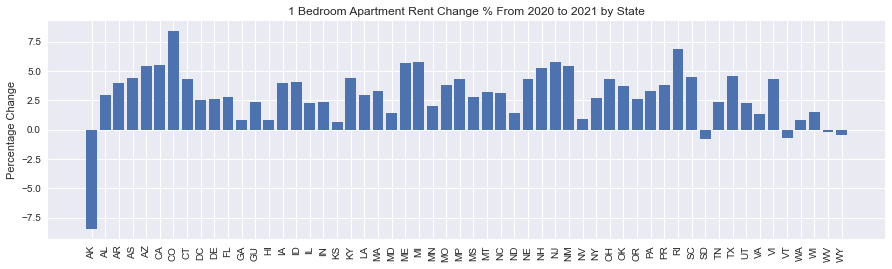

In [65]:
# prepare chart
states = b1DF["State"]
percentage = b1DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('1 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

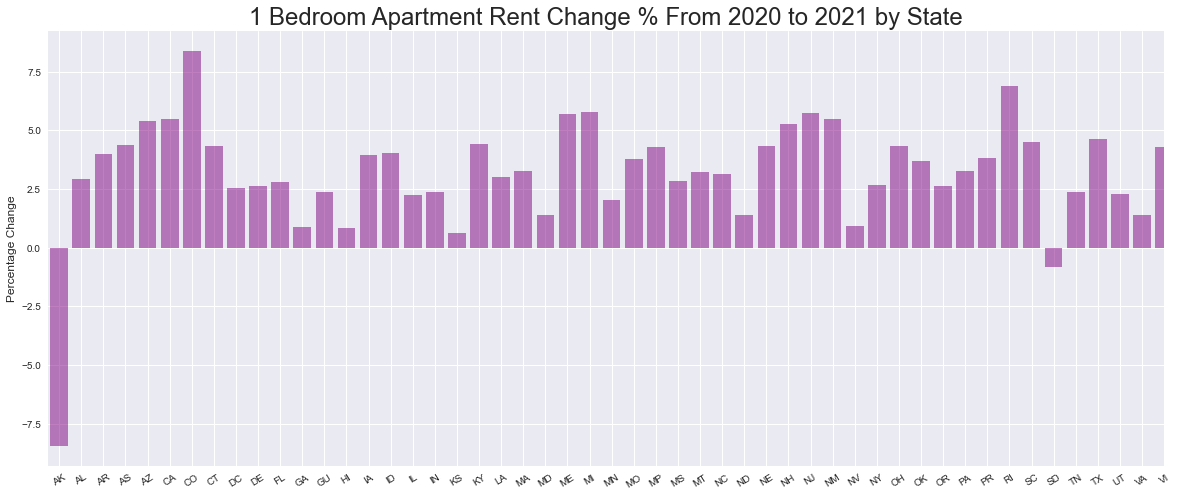

In [131]:
#formating 

states = b1DF["State"]
percentage = b1DF["'21 diff %"]

plt.figure(figsize=(20, 8))
plt.xticks(rotation = 32)
plt.bar(states, percentage,color="purple", alpha=0.5)


plt.xlim(-0.5, len(x_axis))


plt.title('1 Bedroom Apartment Rent Change % From 2020 to 2021 by State',size =24)
plt.ylabel("Percentage Change",size =12)

plt.show()


#plt.savefig("../Maheen/bar_chart_50_counties.png"



# Most Expensive and Least Expensive States by Rent

In [83]:
# Creating DataFrames that shows the average rents per state per bedroom type (using GroupBy function)
state_rent_21_0 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["studio_2021"])
state_rent_21_1 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_1_2021"])
state_rent_21_2 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_2_2021"])
state_rent_21_3 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_3_2021"])
state_rent_21_4 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_4_2021"])

# Create one joined DF
state_rent_21_all = pd.DataFrame({"Studio Avg. Rent": round(state_rent_21_0["studio_2021"],2),
                                  "1 Bedroom Avg. Rent": round(state_rent_21_1["bedroom_1_2021"],2),
                                  "2 Bedroom Avg. Rent": round(state_rent_21_2["bedroom_2_2021"],2),
                                  "3 Bedroom Avg. Rent": round(state_rent_21_3["bedroom_3_2021"],2),
                                  "4 Bedroom Avg. Rent": round(state_rent_21_4["bedroom_4_2021"],2),
                                 })

In [84]:
# Creating a new column that looks at the average rent for all bedroom types
state_rent_21_all["Avg. All"] = round((state_rent_21_all["Studio Avg. Rent"] + 
                                          state_rent_21_all["1 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["2 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["3 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["4 Bedroom Avg. Rent"])/5,2)

# Top 5 Most Expensive States by Rent Price

In [85]:
top_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=False)
top_5_state_rent_21 = top_5_state_rent_21.head()
top_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
HI,1391.40,1552.60,1986.60,2739.20,3158.40,2165.64
DC,1643.00,1682.00,1917.00,2457.00,2978.00,2135.40
MA,1254.81,1392.96,1740.68,2181.54,2414.18,1796.83
CA,1137.10,1290.79,1634.78,2254.05,2612.69,1785.88
NJ,1166.43,1353.29,1670.95,2131.10,2445.00,1753.35


# Bottom 5 Most Expensive States by Rent Price

In [86]:
bottom_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=True)
bottom_5_state_rent_21 = bottom_5_state_rent_21.head()
bottom_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
PR,418.59,448.73,515.82,687.77,818.54,577.89
AR,535.00,574.33,723.04,954.23,1104.27,778.17
MS,573.06,611.72,754.02,974.85,1111.22,804.97
MO,536.25,595.59,762.36,1012.33,1157.58,812.82
KY,548.30,605.41,762.77,1011.48,1144.47,814.49


# Creating a HeatMap Displaying the Most Expensive and Least Expensive States/Counties

In [87]:
# Configuring API Key
gmaps.configure(api_key=g_key)

NameError: name 'g_key' is not defined

In [88]:
# Creating two new blank columns on the DataSet (Latitude and Longitude)
cleaned_rent_20_21_22["latitude"] = ""
cleaned_rent_20_21_22["longitude"] = "" 

In [89]:
# Plotting Latitude and Longitude into the DF (commenting out to avoid exceeding API Limit)

for index, row in cleaned_rent_20_21_22.iterrows():

    # address 
    address = row["county name"]
    
    # Define URL / Response
    response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}').json()
    
    # Add data to DF
    try:
        cleaned_rent_20_21_22.loc[index,"latitude"] = response['results'][0]['geometry']['location']['lat']
        cleaned_rent_20_21_22.loc[index,"longitude"] = response['results'][0]['geometry']['location']['lng']
        
    except:
        print(f'{address} - {index} not found in API')

NameError: name 'g_key' is not defined

In [21]:
# Sullivan part - 1579 not found in API
# Sullivan part - 1580 not found in API
# Toa Baja Municipio - 1651 not found in API

In [29]:
# Export Data
cleaned_rent_20_21_22.to_csv("cleaned_rent_new.csv")

In [30]:
# Read in CSV 
cleaned_rent_new = pd.read_csv("cleaned_rent_new.csv")

# Format CSV to get rid of 3 rows that were not found in API
cleaned_rent_new = cleaned_rent_20_21_22.loc[(cleaned_rent_20_21_22["latitude"] != "") |(cleaned_rent_20_21_22["longitude"] != "")]

In [31]:
# Checking for data types of lat/lng
cleaned_rent_new.dtypes

state               int64
county              int64
county name        object
state initial      object
studio_2020         int64
studio_2021       float64
studio_2022       float64
bedroom_1_2020      int64
bedroom_1_2021    float64
bedroom_1_2022    float64
bedroom_2_2020      int64
bedroom_2_2021    float64
bedroom_2_2022    float64
bedroom_3_2020      int64
bedroom_3_2021    float64
bedroom_3_2022    float64
bedroom_4_2020      int64
bedroom_4_2021    float64
bedroom_4_2022    float64
pop2017             int64
latitude           object
longitude          object
dtype: object

In [32]:
# state               int64
# county              int64
# county name        object
# state initial      object
# studio_2020         int64
# studio_2021       float64
# studio_2022       float64
# bedroom_1_2020      int64
# bedroom_1_2021    float64
# bedroom_1_2022    float64
# bedroom_2_2020      int64
# bedroom_2_2021    float64
# bedroom_2_2022    float64
# bedroom_3_2020      int64
# bedroom_3_2021    float64
# bedroom_3_2022    float64
# bedroom_4_2020      int64
# bedroom_4_2021    float64
# bedroom_4_2022    float64
# pop2017             int64
# latitude           object
# longitude          object
# dtype: object

In [33]:
# Convert Latitude & Longitude to numeric
cleaned_rent_new['latitude'] = pd.to_numeric(cleaned_rent_new['latitude'],errors='coerce')
cleaned_rent_new['longitude'] = pd.to_numeric(cleaned_rent_new['longitude'],errors='coerce')

In [34]:
# Validate data type
cleaned_rent_new.dtypes

state               int64
county              int64
county name        object
state initial      object
studio_2020         int64
studio_2021       float64
studio_2022       float64
bedroom_1_2020      int64
bedroom_1_2021    float64
bedroom_1_2022    float64
bedroom_2_2020      int64
bedroom_2_2021    float64
bedroom_2_2022    float64
bedroom_3_2020      int64
bedroom_3_2021    float64
bedroom_3_2022    float64
bedroom_4_2020      int64
bedroom_4_2021    float64
bedroom_4_2022    float64
pop2017             int64
latitude          float64
longitude         float64
dtype: object

In [35]:
# state               int64
# county              int64
# county name        object
# state initial      object
# studio_2020         int64
# studio_2021       float64
# studio_2022       float64
# bedroom_1_2020      int64
# bedroom_1_2021    float64
# bedroom_1_2022    float64
# bedroom_2_2020      int64
# bedroom_2_2021    float64
# bedroom_2_2022    float64
# bedroom_3_2020      int64
# bedroom_3_2021    float64
# bedroom_3_2022    float64
# bedroom_4_2020      int64
# bedroom_4_2021    float64
# bedroom_4_2022    float64
# pop2017             int64
# latitude          float64
# longitude         float64
# dtype: object

## Heatmap with Counties as Weights

In [36]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

# create coordinates by joining lat and long
locations = cleaned_rent_new[["latitude", "longitude"]]

# price as the weights
prices = cleaned_rent_new["bedroom_1_2021"]

# Plotting the heatmap
fig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Create heat layer
heatLayer = gmaps.heatmap_layer(locations, weights=prices, max_intensity = 4000)

# Add layer
fig.add_layer(heatLayer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Getting the coordinates of each state through a new csv file
state_coordinates = pd.read_csv("state_coordinates.csv")
state_coordinates.head()

,state initial,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [40]:
# Merging coordinates with the top 5 states
top_5_state_cleaned = pd.merge(top_5_state_rent_21, state_coordinates , how="left", on="state initial")
top_5_state_cleaned

,state initial,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All,latitude,longitude,name
0,HI,1391.40,1552.60,1986.60,2739.20,3158.40,2165.64,19.898682,-155.665857,Hawaii
1,DC,1643.00,1682.00,1917.00,2457.00,2978.00,2135.40,38.905985,-77.033418,District of Columbia
2,MA,1254.81,1392.96,1740.68,2181.54,2414.18,1796.83,42.407211,-71.382437,Massachusetts
3,CA,1137.10,1290.79,1634.78,2254.05,2612.69,1785.88,36.778261,-119.417932,California
4,NJ,1166.43,1353.29,1670.95,2131.10,2445.00,1753.35,40.058324,-74.405661,New Jersey


In [41]:
# Merging coordinates with the top 5 states
bottom_5_state_cleaned = pd.merge(bottom_5_state_rent_21, state_coordinates , how="left", on="state initial")
bottom_5_state_cleaned

,state initial,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All,latitude,longitude,name
0,PR,418.59,448.73,515.82,687.77,818.54,577.89,18.220833,-66.590149,Puerto Rico
1,AR,535.00,574.33,723.04,954.23,1104.27,778.17,35.201050,-91.831833,Arkansas
2,MS,573.06,611.72,754.02,974.85,1111.22,804.97,32.354668,-89.398528,Mississippi
3,MO,536.25,595.59,762.36,1012.33,1157.58,812.82,37.964253,-91.831833,Missouri
4,KY,548.30,605.41,762.77,1011.48,1144.47,814.49,37.839333,-84.270018,Kentucky


## 5 Most Expensive States Plotted on Heatmap

In [42]:
# Store the locations
coordinates1 = top_5_state_cleaned[["latitude", "longitude"]]

# Plotting the heatmap
fig1 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Add layer
fig1.add_layer(heatLayer)

# Add a marker layer on the heatmap 
markerLayer = gmaps.marker_layer(coordinates1)

# Add marker layers
fig1.add_layer(markerLayer)

# display figure 
fig1

Figure(layout=FigureLayout(height='420px'))

Above are the mark layers for the most expensive states (Hawaii, DC, Massachussets, California, New Jersey

## 5 Least Expensive States Plotted on Heatmap

In [113]:
# Store the locations
coordinates2 = bottom_5_state_cleaned[["latitude", "longitude"]]

# Plotting the heatmap
fig2 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Add layer
fig2.add_layer(heatLayer)

# Add a marker layer on the heatmap 
markerLayer = gmaps.marker_layer(coordinates2)

# Add marker layers
fig2.add_layer(markerLayer)

# display figure 
fig2

NameError: name 'bottom_5_state_cleaned' is not defined

Above are mark layers for the least expensive states (Puerto Rico, Arkansas, Mississippi, Missouri, Kentucky)

### Moving to another State is not in my Budget. Where do I go now? Which Counties in Georgia do I look into ?

In [90]:
# Checking the rents for GA 

GA_Rents1 = cleaned_rent_20_21_22.loc[(cleaned_rent_20_21_22['state initial'] == 'GA')]

GA_Rents = pd.DataFrame(GA_Rents1)
GA_Rents


,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250,,
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520,,
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215,,
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980,,
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,939,927.0,870.0,998,975.0,955.0,7950,,
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510,,
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,811,865.0,1000.0,998,975.0,1036.0,8895,,
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905,,


In [114]:
# My parent's County rent price:

# # Rents in Gwinnett: 

#cleaned_rent_20_21_22.loc[cleaned_rent_20_21_22['county name'] == 'Gwinnett County']
Gwinnett_County_Rent = cleaned_rent_20_21_22.loc[cleaned_rent_20_21_22['county name'] == 'Gwinnett County']
Gwinnett_County_Rent

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude
73,13,135,Gwinnett County,GA,1065,1101.0,1205.0,1096,1126.0,1226.0,...,1397.0,1592,1615.0,1730.0,1951,1976.0,2115.0,889955,,


In [115]:
## Do this at the end 

# sorting the rent for 1 bedroom from the least to the highest value to check the counties

# GA_Rents.sort_values("bedroom_1_2021", ascending=True)



# Checking all the counties above gives us more options of moving to areas where the rents are cheaper. 
The most cheapest counties for a 1 bedroom place are:

Emanuel countyStewart county, Toombs county, Atkinson County, Dodge County, Wayne County, Calhoun County, Jefferson County, Schley County, Screven County, Elbert County, Berrien County, and Chattooga County  . 

In [120]:
cheapest_counties = ['Emanuel county','Stewart county','Toombs county','Atkinson County','Dodge County','Wayne County','Calhoun County','Jefferson County','Schley County','Screven County','Elbert County','Berrien County','Chattooga County']

In [121]:
cheapest_counties

#plt.savefig("../Maheen/bar_chart_50_counties.png")

['Emanuel county',
 'Stewart county',
 'Toombs county',
 'Atkinson County',
 'Dodge County',
 'Wayne County',
 'Calhoun County',
 'Jefferson County',
 'Schley County',
 'Screven County',
 'Elbert County',
 'Berrien County',
 'Chattooga County']

The counties close to the central have similar rent rates.

### Checking the Rents for Counties in alphabetical order

In [123]:
#first 50 counties 
Fifty_Counties_Rent = pd.DataFrame(GA_Rents)
Fifty_counties_Cleaned_0 = Fifty_Counties_Rent.sort_values("county name", ascending=True) #alphabetical order by county name
Fifty_counties_Cleaned = Fifty_counties_Cleaned_0.head(50)
#Fifty_counties_Cleaned

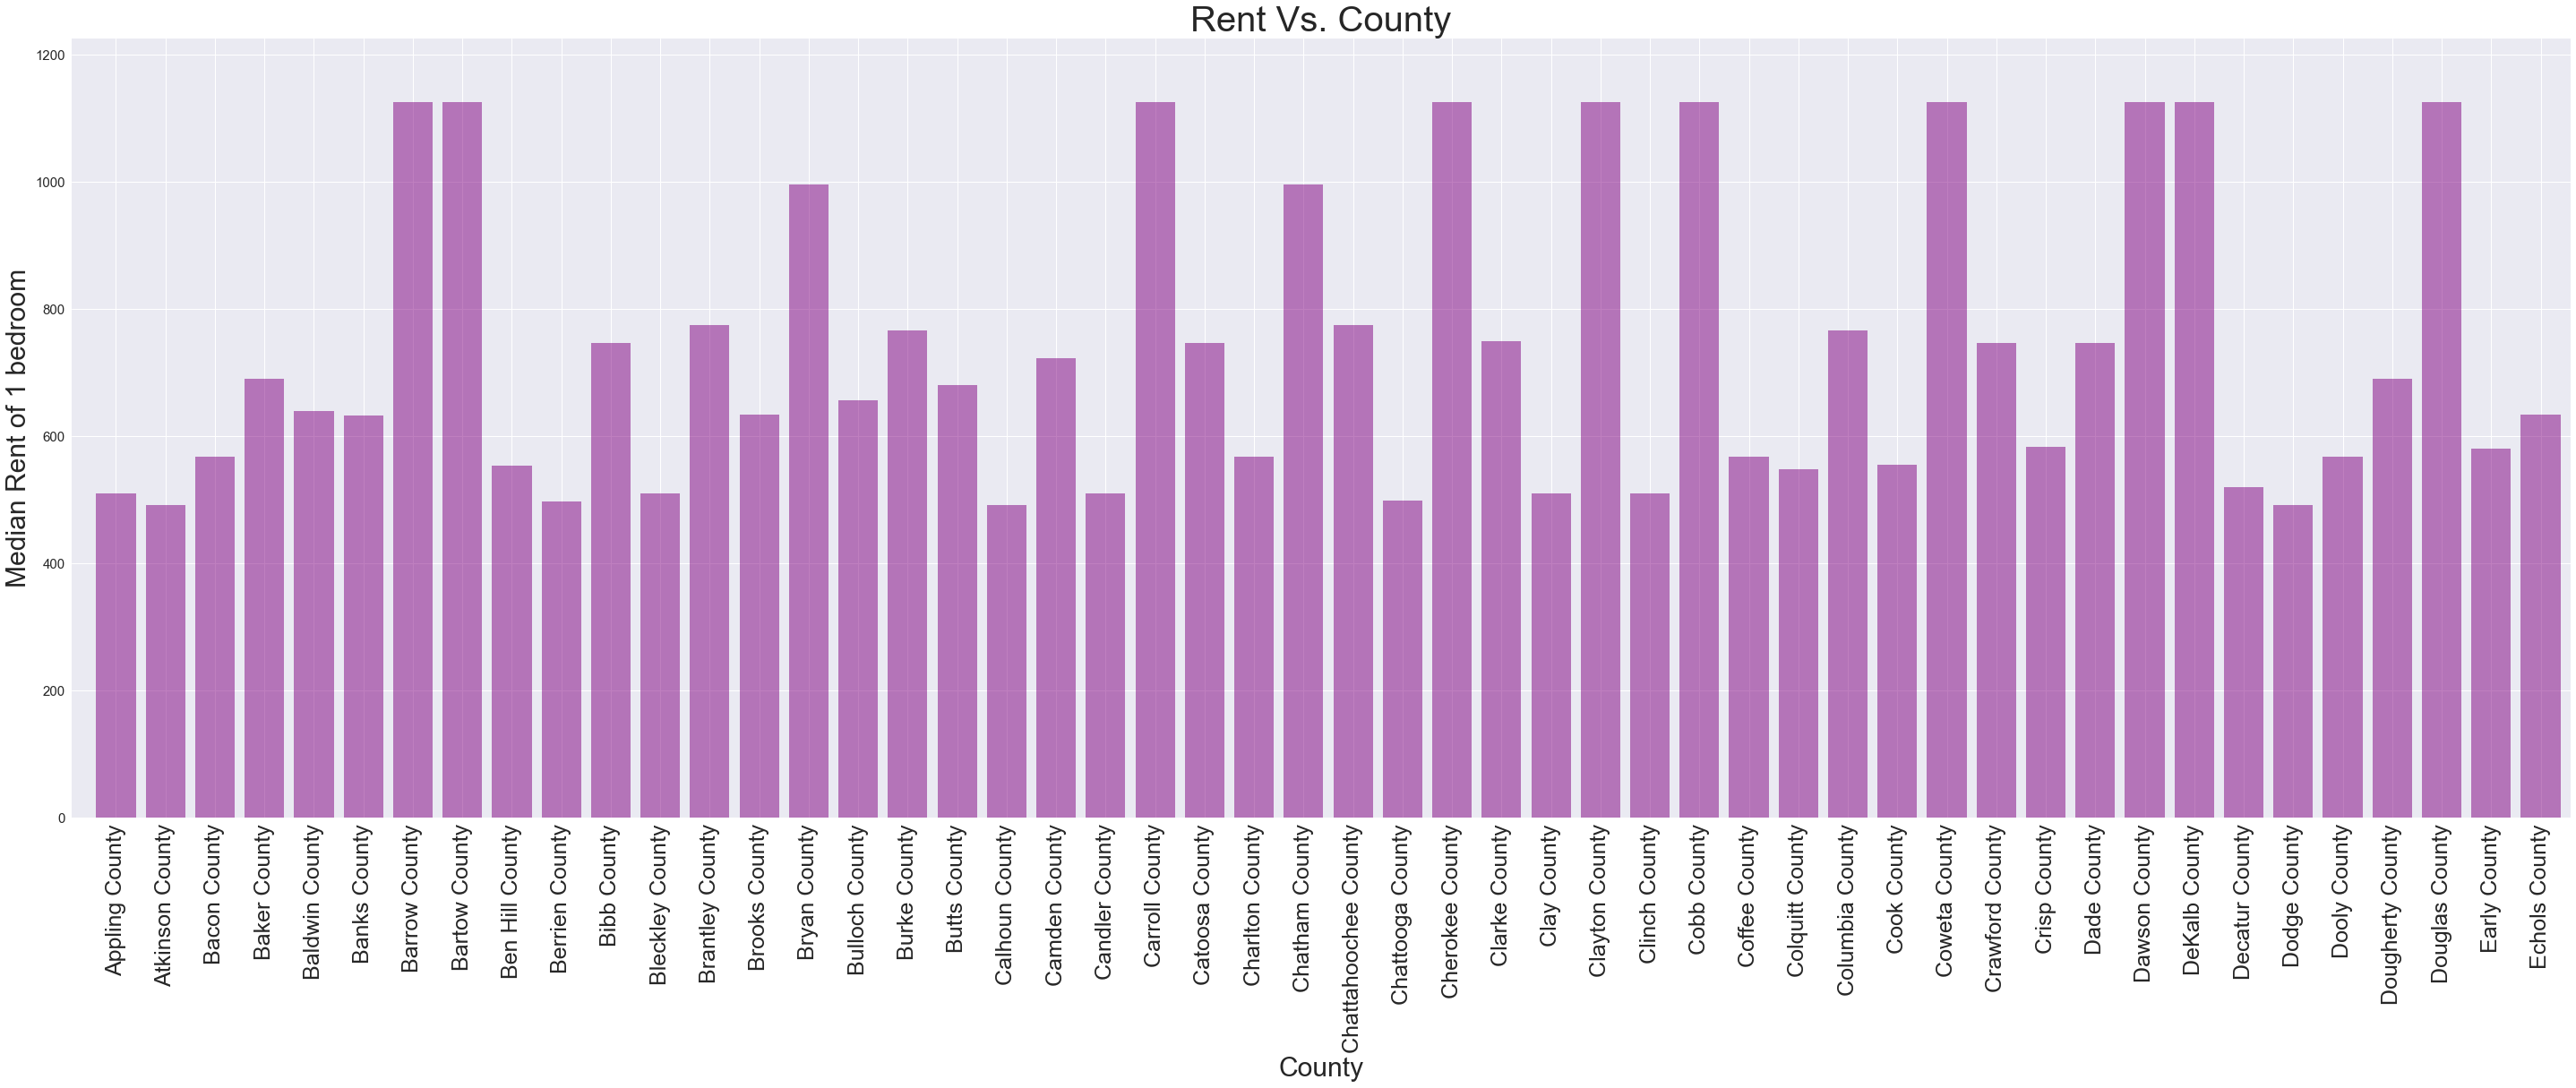

In [124]:
# Plotting a Bar chart for the 1st 50 counties 
# # Set x axis and tick locations
x_axis = np.arange(len(Fifty_counties_Cleaned))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Fifty_counties_Cleaned["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Fifty_counties_Cleaned["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Fifty_counties_Cleaned["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_50_counties.png")
plt.show()


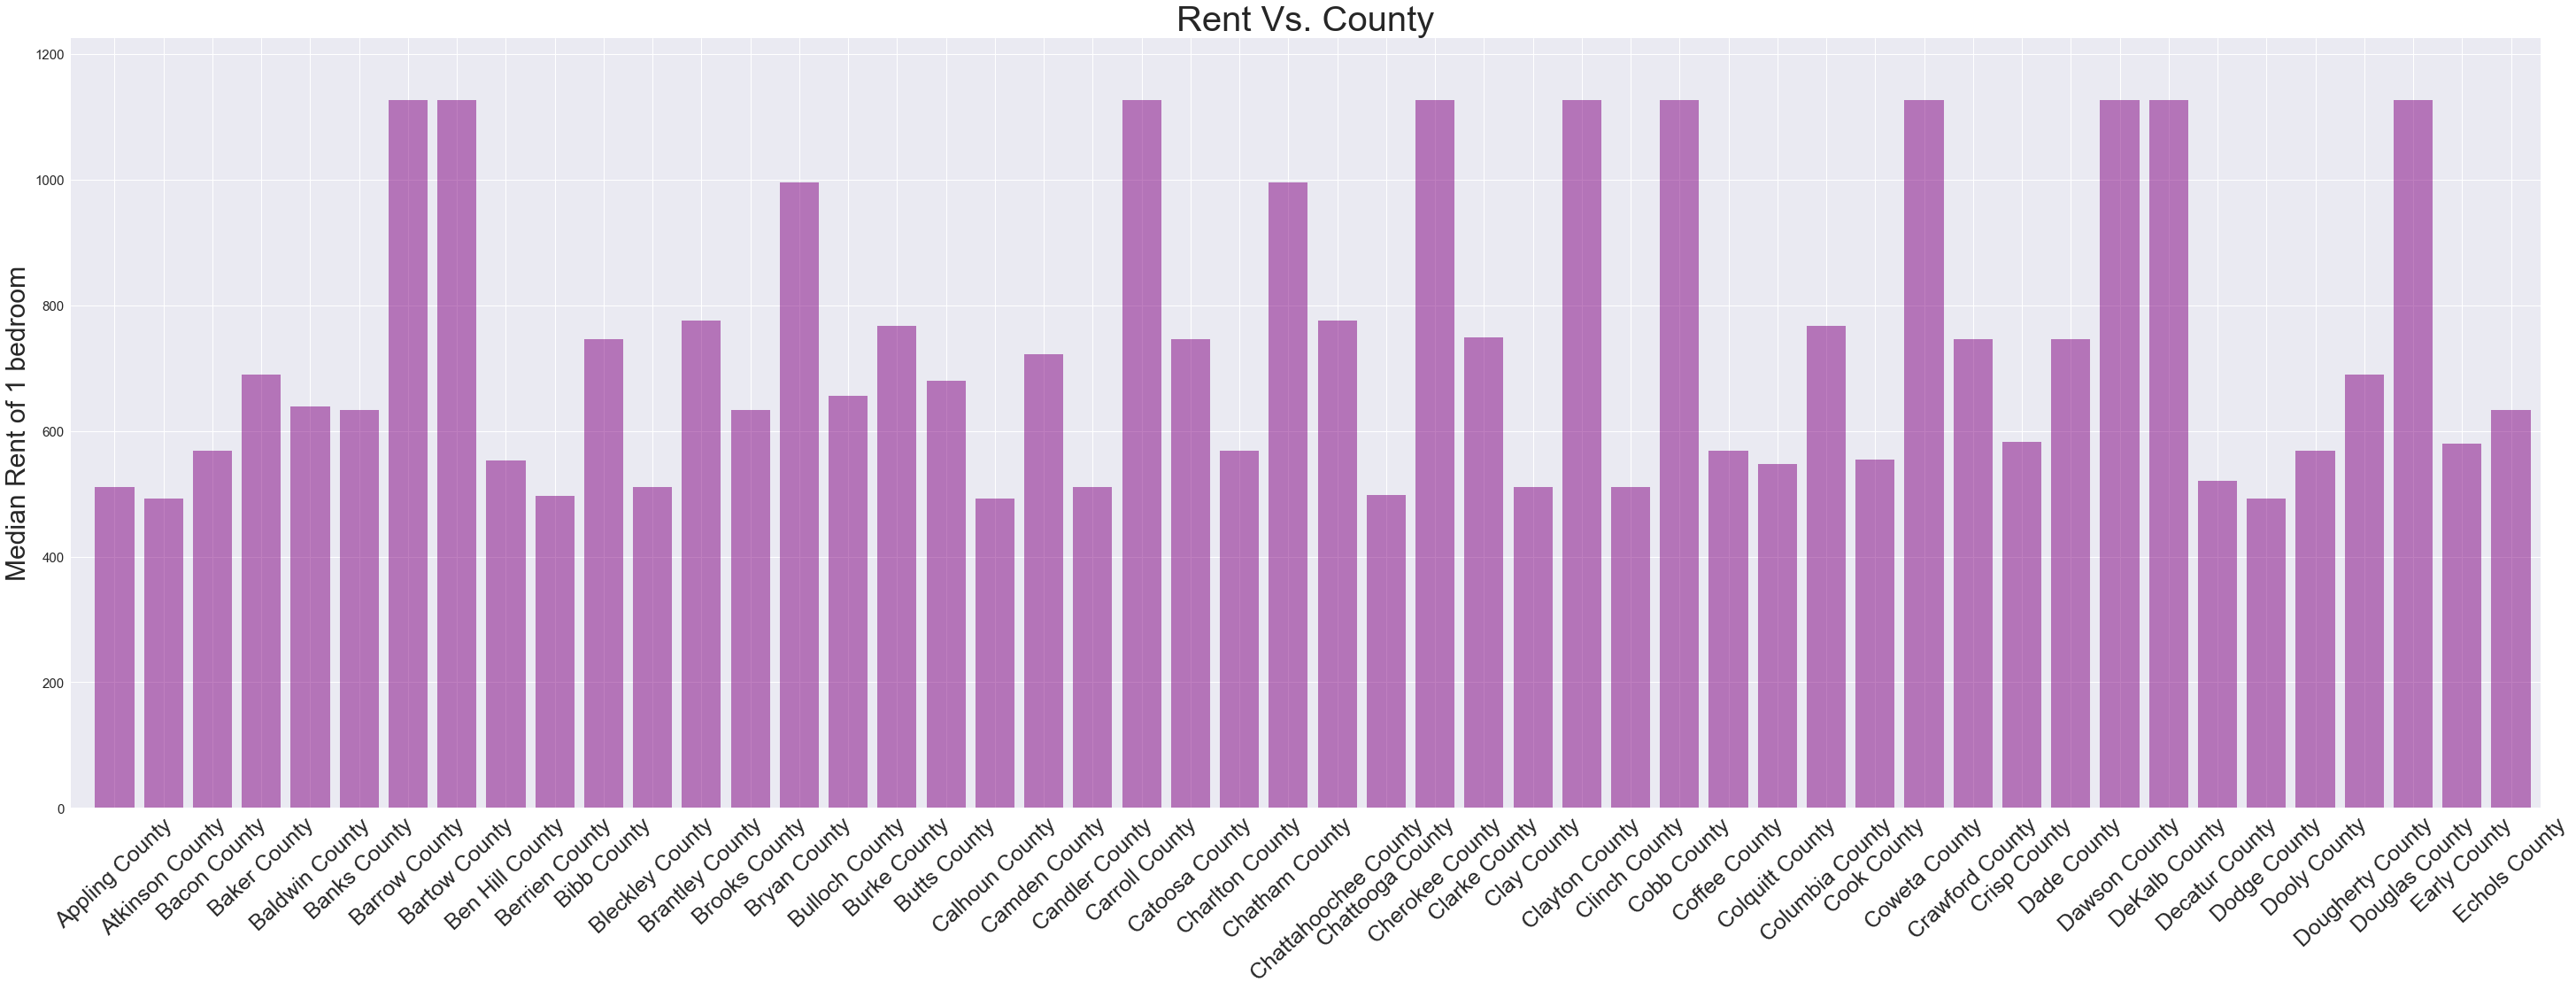

In [145]:
#formating


# Plotting a Bar chart for the 1st 50 counties 
# # Set x axis and tick locations
x_axis = np.arange(len(Fifty_counties_Cleaned))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Fifty_counties_Cleaned["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Fifty_counties_Cleaned["county name"], rotation="43",)

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Fifty_counties_Cleaned["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)

plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
#plt.savefig("../Maheen/bar_chart_50_counties.png")
plt.show()






#william
#not sure how to center x axis text be nice if the 'y' in County touched center. Maybe just keep rotation vertical
#mached coloer took x lable away 



In [146]:
# Displaying the second 50 counties 
Second_fifty_counties = Fifty_counties_Cleaned_0.iloc[50:101]
#Second_fifty_counties

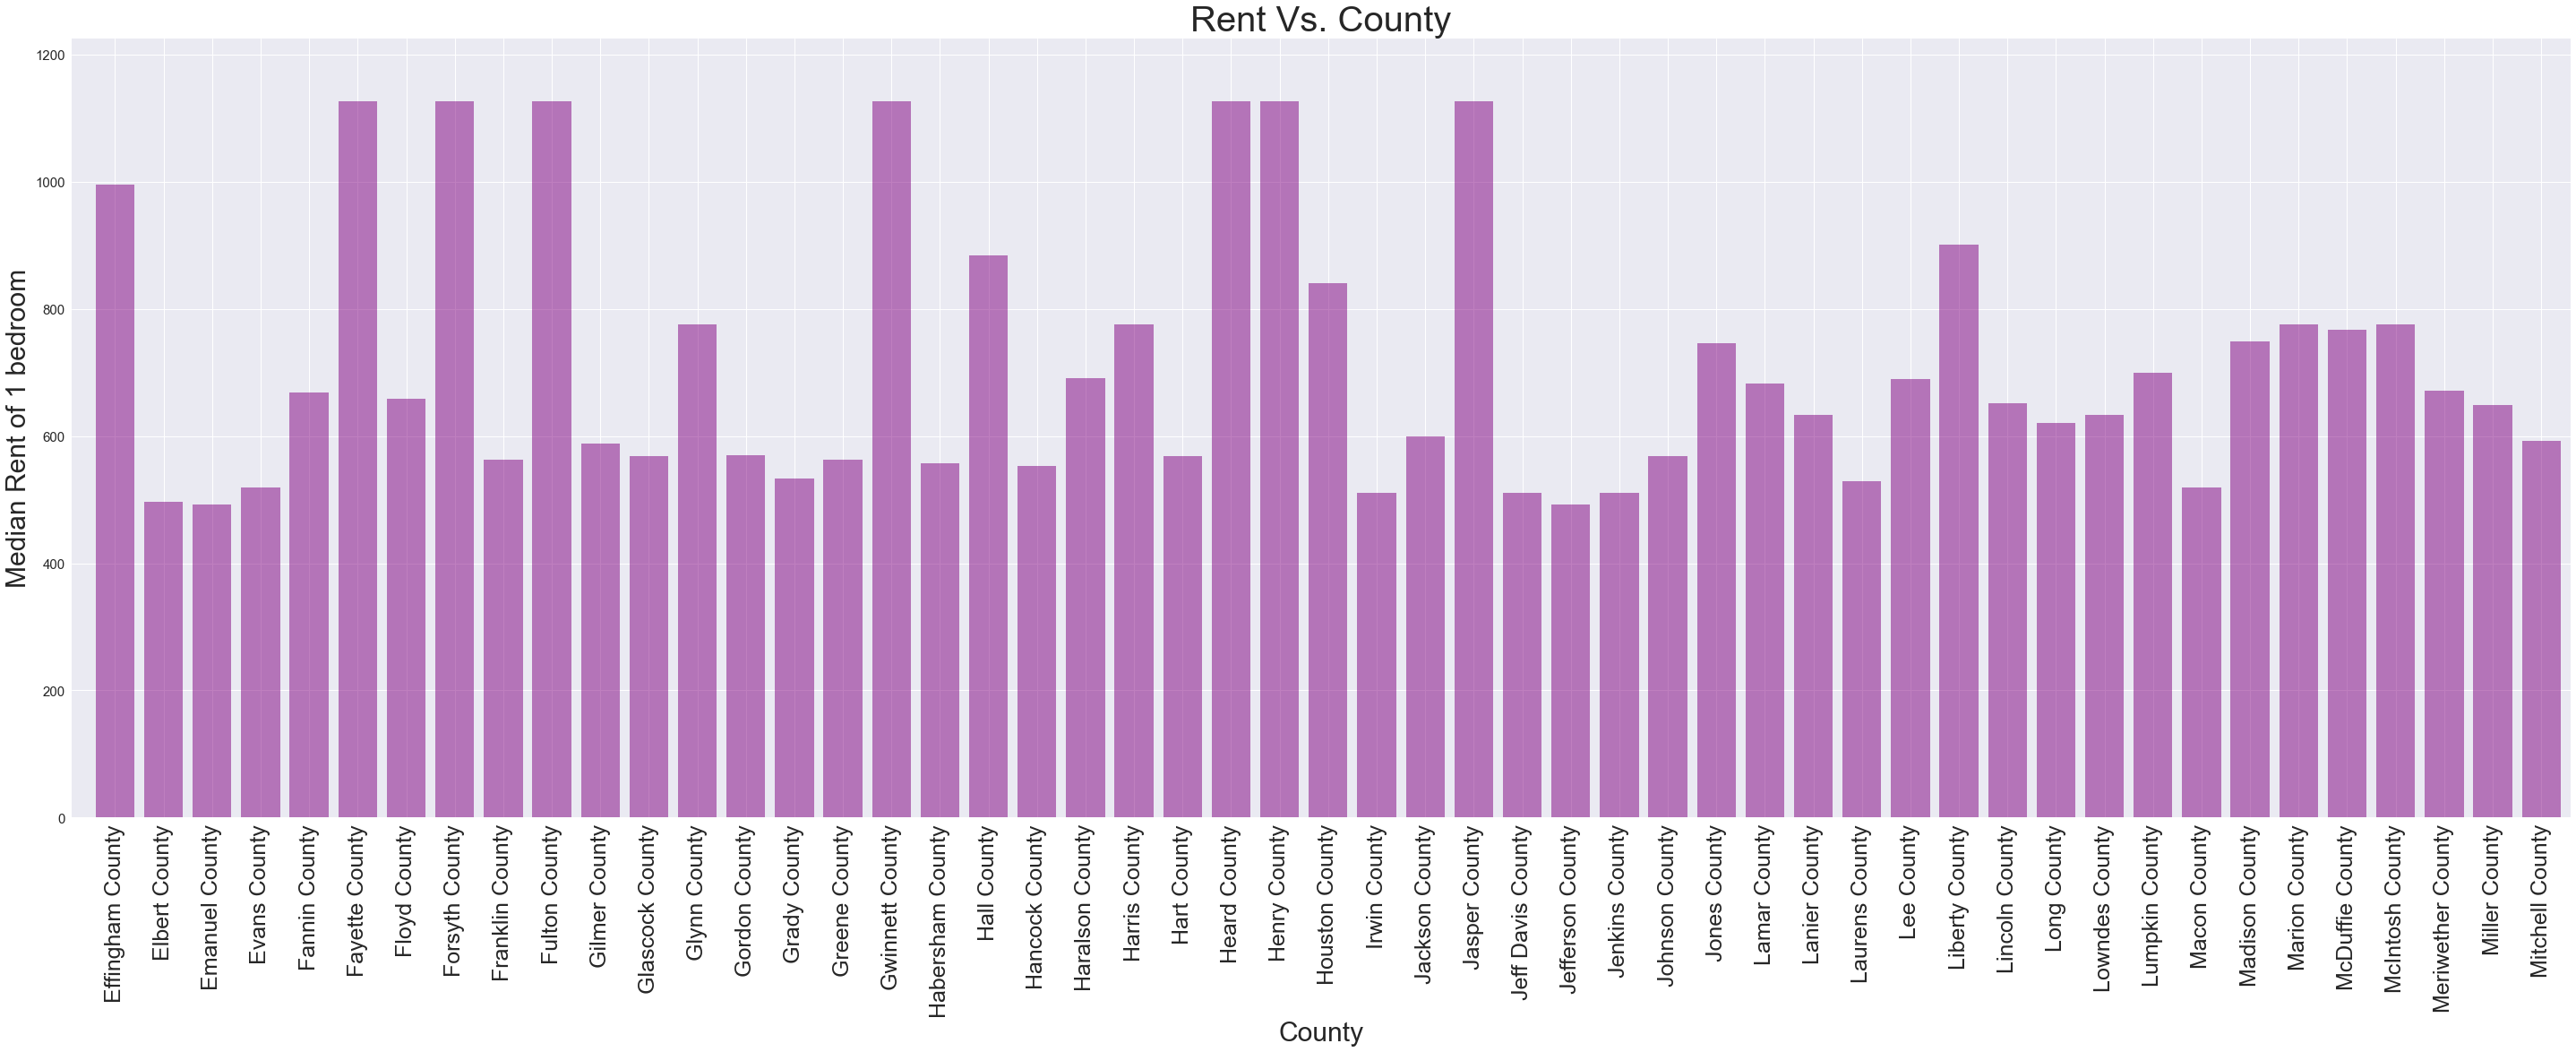

In [147]:
# Plotting a Chart for the next 50 in Georgia

# Set x axis and tick locations
x_axis = np.arange(len(Second_fifty_counties))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Second_fifty_counties["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Second_fifty_counties["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Second_fifty_counties["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_2nd_50_counties.png")
plt.show()


In [148]:
# Checking the rent for  56 counties in Georgia and plotting the graph 

#Fifty_counties_Cleaned_0

Last_56_counties =  Fifty_counties_Cleaned_0.iloc[102:159]
#Last_56_counties


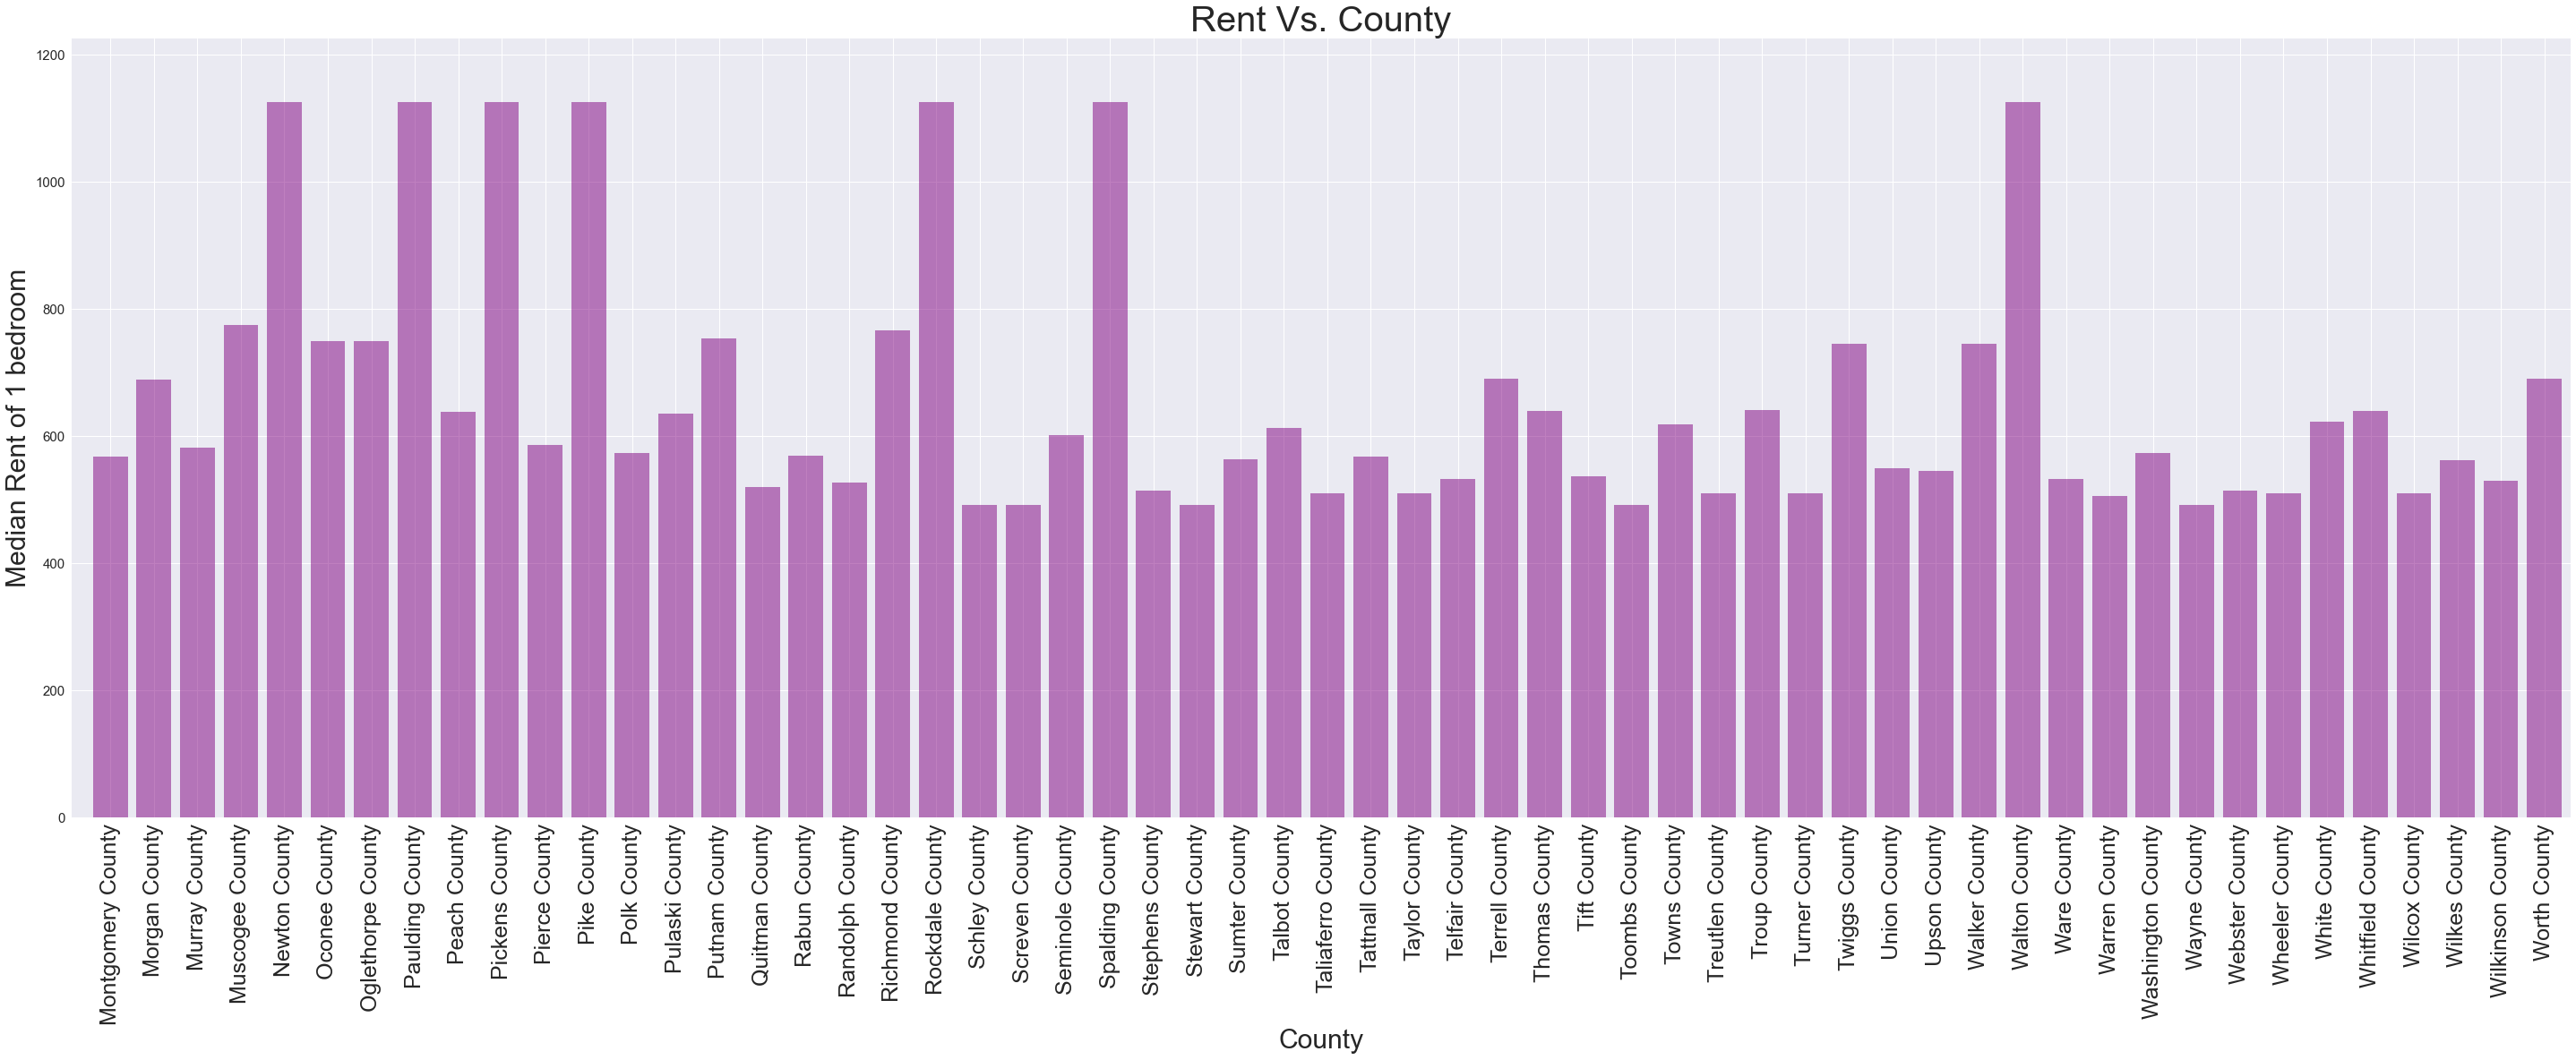

In [149]:
# PLotting a Graph for the last 56 counties in Georgia 

# Set x axis and tick locations
x_axis = np.arange(len(Last_56_counties))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Last_56_counties["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Last_56_counties["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Last_56_counties["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_Last_56_counties.png")
plt.show()


 ## As the graphs are hard to compare, lets convert the counties into the distances from the centre of Atlanta and plot some graphs 

In [151]:
#filter out only GA
ga_df = cleaned_rent_20_21_22['state'] == 13
clean_ga_df= cleaned_rent_20_21_22[ga_df]
clean_ga_df

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250,,
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520,,
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215,,
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980,,
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,939,927.0,870.0,998,975.0,955.0,7950,,
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510,,
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,811,865.0,1000.0,998,975.0,1036.0,8895,,
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905,,


In [152]:
#Export the County seat csv file and convert to DF

counties_df = pd.read_csv('list-counties-georgia.csv')
counties_df

,Sr.No,county name,FIPS code,County seat,Established
0,1,Appling County,1,Baxley,1818
1,2,Atkinson County,3,Pearson,1917
2,3,Bacon County,5,Alma,1914
3,4,Baker County,7,Newton,1825
4,5,Baldwin County,9,Milledgeville,1803
...,...,...,...,...,...
154,155,Whitfield County,313,Dalton,1851
155,156,Wilcox County,315,Abbeville,1857
156,157,Wilkes County,317,Washington,1777
157,158,Wilkinson County,319,Irwinton,1803


In [153]:
# Merge the County seat with the Georgia rents DataFrame 

rent_per_county = pd.merge(clean_ga_df, counties_df, how="left", on=["county name"])
rent_per_county

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude,Sr.No,FIPS code,County seat,Established
0,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,1151,1215.0,1036.0,3250,,,4,7,Newton,1825
1,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,91520,,,47,95,Albany,1853
2,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,29215,,,88,177,Leesburg,1826
3,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,8980,,,135,273,Dawson,1856
4,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,20810,,,159,321,Sylvester,1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,998,975.0,955.0,7950,,,153,309,Alamo,1912
155,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,1035,1035.0,1121.0,28510,,,154,311,Cleveland,1857
156,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,998,975.0,1036.0,8895,,,156,315,Abbeville,1857
157,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,1132,1114.0,1154.0,9905,,,157,317,Washington,1777


In [154]:
clean_rent_per_county = rent_per_county[["state", "county name", "County seat","state initial","studio_2021","bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021"]]
clean_rent_per_county


,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0
...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0


In [155]:
#Run a test to show lat and lng is found for each county center
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
Lat=[]
Lng=[]
countySeatsGa= []
countySeatstest = clean_rent_per_county['County seat'].tolist()
for x in countySeatstest:
    target_city = f"{x}, Georgia"
    params = {"address": target_city, "key": g_key}
    
    response = requests.get(base_url, params=params).json()
    
    try:
        lat = response["results"][0]["geometry"]["location"]["lat"]
        lng = response["results"][0]["geometry"]["location"]["lng"]
        Lat.append(lat)
        Lng.append(lng)
        countySeatsGa.append(target_city)
        print(f"{target_city} found!")
    except:
        print(f"{target_city} not found, skipping")
# Extract lat/lng
    
# Print results
print("done")

NameError: name 'g_key' is not defined

In [156]:
#Add lat and lng to dataframe
coord_county = pd.DataFrame(clean_rent_per_county)
coord_county['lat'] = Lat
coord_county['lng'] = Lng
coord_county['coordinates'] = list(zip(coord_county.lat, coord_county.lng))
coord_county

ValueError: Length of values (0) does not match length of index (159)

In [ ]:
distance = []
origin = "Atlanta, Georgia"
destinations = coord_county.coordinates

gmaps = googlemaps.Client(key=g_key)
for destination in destinations:
    results = gmaps.distance_matrix(origin, destination, mode = 'driving')["rows"][0]["elements"][0]["distance"]["value"]
    results = round(results/1609)
    distance.append(results)

coord_county["Distance (miles)"] = distance
coord_county

In [157]:
#Write DataFrame to CSV 
coord_county.to_csv("Rent Based on Distance.csv")

In [158]:
#create dataframe for one bedroom apt
new_rent = coord_county[["state", "county name", "County seat","state initial", "Distance (miles)", "bedroom_1_2021", "lat", "lng"]]


KeyError: "['Distance (miles)', 'lat', 'lng'] not in index"

In [ ]:
#show top 10 low rent prices

#filter out rent <= 492
low_rent = new_rent['bedroom_1_2021'] ==492
clean_low_rent = new_rent[low_rent]

#make clean_low_rent into a dataframe
min_rent = pd.DataFrame(clean_low_rent)
min_rent

In [159]:
#sort in descending order for bedroom price and show top 10 high rent prices
#coord_county.sort_values(by='bedroom_1_2021', ascending = False).head(10)
#filter out rent == 492
high_rent = new_rent['bedroom_1_2021'] ==1126
clean_high_rent = new_rent[high_rent]

#make clean_low_rent into a dataframe
max_rent = pd.DataFrame(clean_high_rent)
max_rent

NameError: name 'new_rent' is not defined

In [160]:
#use .describe in order to get the description of numerical data e.g. count, mean, std dev, percentiles (quartiles)
new_rent.describe().round(2)

NameError: name 'new_rent' is not defined

In [161]:
#create a scatter plot for Distance vs Rent Price for a 1 bedroom in 2021
#set x and y values
x_values = new_rent['Distance (miles)']
y_values = new_rent['bedroom_1_2021']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.ylabel('Rent Price for 1 Bedroom in 2021 ($)')
plt.xlabel('Distance from County Center to Atl (mil)')
plt.title(f"Distance vs. Rent Price")
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show
#Observations made from the data below.
#1. Linear regression has a negative slope indicating that the rent price decreases the further away form Atlanta you live
#2. Rent price is highest if you live within 60 miles of Atlanta
#3. Prices increased again when you get more than 200 miles outside of atlanta

NameError: name 'new_rent' is not defined

In [162]:
#formating 



#create a scatter plot for Distance vs Rent Price for a 1 bedroom in 2021
#set x and y values
x_values = new_rent['Distance (miles)']
y_values = new_rent['bedroom_1_2021']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", color = "purple")
plt.ylabel('Rent Price for 1 Bedroom in 2021 ($)')
plt.xlabel('Distance from County Center to Atl (mil)')
plt.title(f"Distance vs. Rent Price")
plt.annotate(line_eq,(20,15), fontsize =15,color="green")

plt.ylim(bottom = -35000, top = 330000)

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show
#Observations made from the data below.
#1. Linear regression has a negative slope indicating that the rent price decreases the further away form Atlanta you live
#2. Rent price is highest if you live within 60 miles of Atlanta
#3. Prices increased again when you get more than 200 miles outside of atlanta





#great observations! lets be sure to use this. 
#matched coloers 
#gave plt.ylim to mach output

NameError: name 'new_rent' is not defined

In [80]:
import gmaps

# Access maps with unique API key
gmaps.configure(api_key=g_key)

# create coordinates by joining lat and long
locations = new_rent[["lat", "lng"]].astype(float)

# price as the weights
rent = new_rent["bedroom_1_2021"].astype(float)

# Plotting the heatmap
fig = gmaps.figure(center=(32.1656, -82.9001), zoom_level=6.6)

# Create heat layer
heatLayer = gmaps.heatmap_layer(locations, weights=rent, max_intensity = 1000)

# Add layer
fig.add_layer(heatLayer)

In [81]:

# Convert hotel name to list
min_rent_list = min_rent["County seat"].tolist()

# Add marker layer ontop of heat map
marker_locations = min_rent[['lat', 'lng']]

# Create a marker_layer using the hotel list to fill the info box
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [82]:
distance_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
group_names = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

withbins = coord_county

In [83]:
withbins["Miles Range"] = pd.cut(distance, distance_bins, labels=group_names, right=False)
withbins

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,lat,lng,coordinates,Distance (miles),Miles Range
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,31.312957,-84.335742,"(31.3129575, -84.3357424)",205,180-210
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,31.578507,-84.155741,"(31.5785074, -84.15574099999999)",182,180-210
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,31.732116,-84.170742,"(31.7321156, -84.1707423)",176,150-180
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,31.773500,-84.446583,"(31.7735001, -84.4465826)",167,150-180
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,31.530735,-83.835454,"(31.5307349, -83.8354542)",172,150-180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,32.147120,-82.777917,"(32.1471202, -82.7779171)",160,150-180
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,34.597040,-83.763237,"(34.5970402, -83.7632366)",81,60-90
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,31.992122,-83.306824,"(31.9921223, -83.3068243)",152,150-180
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,33.736795,-82.739309,"(33.7367948, -82.7393089)",110,90-120


In [84]:
distance_list = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

# Create empty list  for plotting
price_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rangeDistance in distance_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    lastCount = withbins.loc[withbins["Miles Range"] == rangeDistance, "bedroom_1_2021"]
    # add subset 
    price_list.append(lastCount)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = lastCount.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= lastCount.loc[(lastCount < lower_bound)|(lastCount > upper_bound)]
    print(f"{rangeDistance}'s potential outliers: {outliers}")

<30's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
30-60's potential outliers: 33    680.0
34    691.0
37    689.0
55    884.0
Name: bedroom_1_2021, dtype: float64
60-90's potential outliers: 25    1126.0
28    1126.0
Name: bedroom_1_2021, dtype: float64
90-120's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
120-150's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
150-180's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
180-210's potential outliers: 0     690.0
1     690.0
82    656.0
Name: bedroom_1_2021, dtype: float64
210-240's potential outliers: 56    901.0
64    996.0
66    996.0
Name: bedroom_1_2021, dtype: float64
240-270's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
270-310's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)


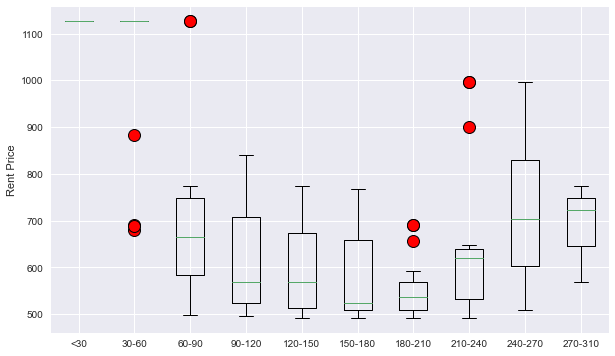

In [85]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
red = dict(marker='o', markerfacecolor='r', markersize=12,)
ax1.boxplot(price_list, flierprops=red,)
plt.xticks([1, 2, 3, 4, 5, 6,7,8,9,10], distance_list)
ax1.set_ylabel('Rent Price')
            
plt.show()

In [86]:
# Finding the Average rent price of all the places with n number of bedrooms 


averagestudio = withbins.groupby(["Miles Range"]).mean()["studio_2021"]
average1bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]
average2bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_2_2021"]
average3bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_3_2021"]
average4bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]

In [87]:
# converting it into a DataFrame 

distanceRangePriceSummary = pd.DataFrame({"Average Price Studio" : averagestudio.round(2),
                                 "Average price 1bedroom ": average1bedroom.round(2),
                                 "Average price 2bedroom ": average2bedroom.round(2),
                                 "Average price 3bedroom ": average3bedroom.round(2),
                                 "Average price 4bedroom ": average4bedroom.round(2),
                                 "Miles Range":["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"], })


distanceRangePriceSummary

,Average Price Studio,Average price 1bedroom,Average price 2bedroom,Average price 3bedroom,Average price 4bedroom,Miles Range
Miles Range,,,,,,
<30,1101.00,1126.00,1284.00,1615.00,1126.00,<30
30-60,1019.37,1043.89,1205.37,1529.05,1043.89,30-60
60-90,637.00,686.50,831.47,1091.87,686.50,60-90
90-120,583.17,616.74,763.13,1002.78,616.74,90-120
120-150,571.00,603.10,724.20,963.80,603.10,120-150
150-180,553.50,573.29,706.57,942.21,573.29,150-180
180-210,539.67,551.38,678.90,895.29,551.38,180-210
210-240,632.00,648.82,798.82,1075.53,648.82,210-240
240-270,713.75,728.75,887.25,1241.25,728.75,240-270


<AxesSubplot:xlabel='Miles Range'>

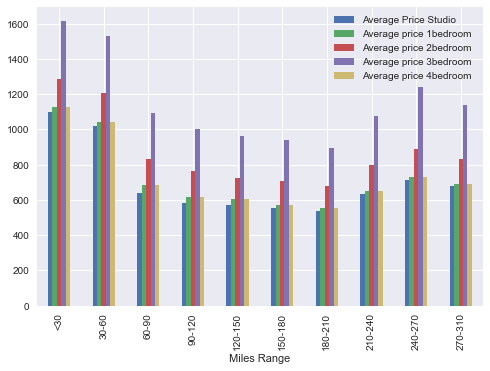

In [88]:
# plotting a bar Chart accoring to the miles range 

distanceRangePriceSummary.plot(x="Miles Range", y=["Average Price Studio",
                                                  "Average price 1bedroom ",
                                                  "Average price 2bedroom ",
                                                  "Average price 3bedroom ",
                                                  "Average price 4bedroom "], kind ="bar")

## Need to find a Leasing Office 

In [89]:
# Finding a leasing office 

leasing_office_find = new_rent
leasing_office_find

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
0,13,Baker County,Newton,GA,205,690.0,31.312957,-84.335742
1,13,Dougherty County,Albany,GA,182,690.0,31.578507,-84.155741
2,13,Lee County,Leesburg,GA,176,690.0,31.732116,-84.170742
3,13,Terrell County,Dawson,GA,167,690.0,31.773500,-84.446583
4,13,Worth County,Sylvester,GA,172,690.0,31.530735,-83.835454
...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,160,510.0,32.147120,-82.777917
155,13,White County,Cleveland,GA,81,623.0,34.597040,-83.763237
156,13,Wilcox County,Abbeville,GA,152,510.0,31.992122,-83.306824
157,13,Wilkes County,Washington,GA,110,562.0,33.736795,-82.739309


In [90]:
#check for a leasing office near each county center
# params dictionary to update each iteration
params = {
    "radius": 30,
    "types": "office",
    "keyword": "leasing office",
    "key": g_key
}

# Use the lat/lng we recovered to identify airports
for index, row in leasing_office_find.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lng = row["lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "International Airport" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(name_address.url)

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        leasing_office_find.loc[index, 'Leasing Office'] = name_address["results"][0]["name"]
        leasing_office_find.loc[index, 'Leasing Office Address'] = name_address["results"][0]["vicinity"]
        leasing_office_find.loc[index, 'Leasing Office Rating'] = name_address["results"][0]["rating"]
    except (KeyError, IndexError):
        leasing_office_find.loc[index, 'Leasing Office'] = "No leasing office nearby"
        leasing_office_find.loc[index, 'Leasing Office Address'] = "No"
        leasing_office_find.loc[index, 'Leasing Office Rating'] = "No"
        print("Missing field/result... skipping.")
        
leasing_office_find

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng,Leasing Office,Leasing Office Address,Leasing Office Rating
0,13,Baker County,Newton,GA,205,690.0,31.312957,-84.335742,No leasing office nearby,No,No
1,13,Dougherty County,Albany,GA,182,690.0,31.578507,-84.155741,"Lone Star Equities, INC.","323 Pine Ave #206, Albany",4.5
2,13,Lee County,Leesburg,GA,176,690.0,31.732116,-84.170742,Park Senior Village,Leesburg,0
3,13,Terrell County,Dawson,GA,167,690.0,31.773500,-84.446583,Dawson Compress & Storage,"151 N Main St, Dawson",0
4,13,Worth County,Sylvester,GA,172,690.0,31.530735,-83.835454,No leasing office nearby,No,No
...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,160,510.0,32.147120,-82.777917,No leasing office nearby,No,No
155,13,White County,Cleveland,GA,81,623.0,34.597040,-83.763237,Whitehall Commons,Cleveland,4
156,13,Wilcox County,Abbeville,GA,152,510.0,31.992122,-83.306824,No leasing office nearby,No,No
157,13,Wilkes County,Washington,GA,110,562.0,33.736795,-82.739309,Georgia Realty Sales,"19 East Square, Washington",4.3


## Locating the Leasing office on Google Maps

In [91]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)
#create a heat map
locations = leasing_office_find[["lat", "lng"]].astype(float)
weights = leasing_office_find["bedroom_1_2021"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=weights, 
                                 dissipating=False, max_intensity=500, point_radius =1)

fig.add_layer(heat_layer)

info_box_template = """
<dl>
<dt>Name</dt><dd>{Leasing Office}</dd>
<dt>City</dt><dd>{County seat}</dd>
<dt>Rent_Price_1bedroom</dt><dd>{bedroom_1_2021}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
leasing_office_info = [info_box_template.format(**row) for index, row in leasing_office_find.iterrows()]
locations = leasing_office_find[["lat", "lng"]]

### Putting a marker on the hotels

In [92]:
marker_layer = gmaps.marker_layer(locations, info_box_content = leasing_office_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))